In [ ]:
"課題１について教え合うことがあれば記入してください：
１）教えてあげた人の名前：
２）教えてもらった人の名前：

"感想（課題の難しさや課題を解けた時間など）：

順番に従ってやったら、簡単だった。
たくさんループや条件分岐を使ってしまったが、特にわからないところはなかった。
難しかったのは、一次関数をプロットする方法を忘れていたこと。調べたらすぐできた。
"患者データを読みとって，患者クラスに渡す"の課題は意味がよくわからなかった。とりあえず患者のリストだけ作っておいた。
大変だったのはクラスを毎回コピペしなければならないこと。クラスの継承というものがあるみたいだが、jupyterでどうやるかわからなかった。
クラスの継承ができたら、すごくすっきりしたソースコードになったと思う。
合計でかかった時間は、多分三時間弱ぐらい。


In [1]:
"リストの平均値" #１点
def Average(L):
    N = len(L)
    s = 0
    for i in L:
        s += i
    ave = s/N
    
    
    return ave

L = [1, 2]
print(Average(L))

1.5


In [7]:
"条件値と同じデータの個数とそのindex(順番)" #１.5点
def CountIfEqual(L, cond):
    cnt = 0
    index =[]
    N = len(L)
    for i in range(N):
        if L[i] == cond:
            cnt += 1
            index.append(i)
    

    #
    #
    
    
    return cnt, index

L = [1, 2, 2, 2, 3]
print (CountIfEqual(L, 2)) #Lにある2の個数とそのindex(順番)
L_ = [3, 'test', 'test', 'b', 4]
print (CountIfEqual(L_, 'test')) #L_にあるtestの個数とそのindex(順番)

(3, [1, 2, 3])
(2, [1, 2])


In [8]:
"条件値とより小さいデータの個数とそのindex" #0.5点
def CountIfLess(L, cond):
    cnt = 0
    index = []
    N = len(L)
    for i in range(N):
        if L[i] < cond:
            cnt += 1
            index.append(i)
    
    
    return cnt, index

L = [1, 2, 2, 2, 3]
print (CountIfLess(L, 2)) #Lに,2より小さい個数とそのindex

(1, [0])


In [9]:
"条件値とより大きいデータの個数とそのindex" #0.5点
def CountIfGreat(L, cond):
    cnt = 0
    index = []
    N = len(L)
    for i in range(N):
        if L[i] > cond:
            cnt += 1
            index.append(i)
    
    
    return cnt, index

L = [1, 2, 2, 2, 3, 5, 5, 6]
print (CountIfGreat(L, 2)) #Lに,2より大きい個数,そのindex

(4, [4, 5, 6, 7])


In [11]:
"条件の範囲にあるデータの個数とそのindex"  #1点
def CountIfInRange(L, low_Val, high_Val):
    cnt = 0
    index = []
    N = len(L)
    for i in range(N):
        if low_Val< L[i] < high_Val:
            cnt += 1
            index.append(i)

    return cnt, index

L = [1, 2, 2, 2, 3, 5, 6 , 7]
print (CountIfInRange(L, 2, 6)) #2より大きく，６より小さいデータの個数,とそのindex

(2, [4, 5])


0.51 35.0


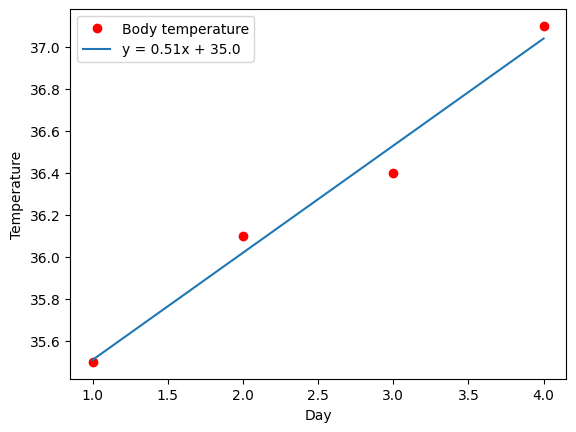

In [ ]:
"一次関数（y = ax + b）のフィッティング係数（近似直線の係数）" #2
def fitting_a_b(x, y):
    N   = len(y) #
    Sxy = 0
    Sx = 0 
    Sy = 0
    Sx2 =0
    for i in range(N):
        xi = x[i]
        yi = y[i]
        Sxy += xi * yi
        Sx += xi
        Sy += yi
        Sx2 += xi **2
    
    # 係数
    a = (N*Sxy - Sx*Sy)/(N*Sx2 - Sx**2) #直線の傾き
    b = (Sx2*Sy - Sx*Sxy)/(N*Sx2 - Sx**2)
    
    return a, b

# グラフで確認
import matplotlib.pyplot as plt

Day = [1, 2, 3, 4]
Temperature = [35.5, 36.1, 36.4, 37.1]

a, b = fitting_a_b(Day, Temperature)
a = round(a,5)
b = round(b,5)
print(a, b)
Y = []
for j in Day:
    y = a*j + b
    Y.append(y)

#y = a*x + b
#y = ax+b, xは日の変数

plt.plot(Day,Temperature,'ro',label='Body temperature')
plt.plot(Day,Y, label = f'y = {a}x + {b} ')
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.legend()
plt.show()


In [3]:
"患者のクラス"  #2点

class Patient:
    def __init__(self, ID, gender, medicine, temperatureList):
        self.ID = ID; self.gender = gender; self.medicine = medicine; self.temperatureList = temperatureList
    
    def AverageTemp(self):
        N = len(self.temperatureList)
        s = 0
        for i in self.temperatureList:
            s += i
        ave = s/N
        return ave
    
    def TemperatureIncreasingRate(self): #体温増加率（近似直線の傾き）
        N = len(self.temperatureList)
        day = [i for i in range(N)]
        Sxy = 0
        Sx = 0 
        Sy = 0
        Sx2 =0
        for i in range(N):
            xi = day[i]
            yi = self.temperatureList[i]
            Sxy += xi * yi
            Sx += xi
            Sy += yi
            Sx2 += xi **2
        a = (N*Sxy - Sx*Sy)/(N*Sx2 - Sx**2) #直線の傾き
        b = (Sx2*Sy - Sx*Sxy)/(N*Sx2 - Sx**2)
        return a
    
    def maxTemperature(self):
        return max(self.temperatureList)
    
    def minTemperature(self):
        return min(self.temperatureList)

#確認
ID1 = "A001"
gend = "M"
medicine = "Yes"
TempList1 = [35.5, 36.0, 36.3, 37.0]
patient1 = Patient(ID1, gend, medicine, TempList1)
print("平均体温",patient1.AverageTemp())
print("体温増加率",patient1.TemperatureIncreasingRate())
print("最高体温",patient1.maxTemperature())
print("最低体温",patient1.minTemperature())

平均体温 36.2
体温増加率 0.47999999999999543
最高体温 37.0
最低体温 35.5


In [10]:
"患者データを読みとって，患者クラスに渡す" #3点
import csv

#f = open('patientlist.csv', 'r')
f = open('patientlist.csv', 'r', encoding="utf-8") #windows の場合
dataReader = csv.reader(f)

csvFileRow = []
#dataの各行をcsvFileRowに入れる
for row in dataReader:
    #print(row)
    csvFileRow.append(row)

label = csvFileRow.pop(0)

nRow = len(csvFileRow) 
print("lines = ", nRow)
patientList = [] #患者リストの作成
for i in csvFileRow:
    id = i[0]
    gend= i[1]
    medic= i[2]
    tempList= [i[3],i[4],i[5],i[6]]
        #string list からfloat listの変換注意，
    pat = id, gend, medic, tempList
    patientList.append(pat)
#print(patientList)
f.close()

lines =  12
[('A001', 'F', 'No', ['35.4', '35.9', '36.9', '37.2']), ('A002', 'F', 'Yes', ['36', '35.8', '35.7', '35.5']), ('B001', 'M', 'No', ['36.5', '36.7', '37', '37.5']), ('C002', 'F', 'No', ['35.8', '36.3', '37', '37.5']), ('C003', 'M', 'Yes', ['36', '36.3', '36.8', '38.2']), ('C004', 'M', 'Yes', ['37', '36.5', '36.1', '36']), ('D001', 'M', 'Yes', ['38.5', '37', '36.5', '35.8']), ('D002', 'M', 'Yes', ['37', '37', '36.8', '36.8']), ('D003', 'F', 'Yes', ['38', '37', '36', '35.5']), ('D004', 'F', 'No', ['38.5', '38', '37.5', '38.2']), ('D005', 'M', 'No', ['37', '38', '38.5', '39']), ('D006', 'F', 'Yes', ['37', '36.5', '36.5', '35.5'])]


In [20]:
"男性患者と女性患者それぞれの人数" #2点
import csv

#f = open('patientlist.csv', 'r')
f = open('patientlist.csv', 'r', encoding="utf-8") #windows の場合
dataReader = csv.reader(f)

csvFileRow = []
#dataの各行をcsvFileRowに入れる
for row in dataReader:
    #print(row)
    csvFileRow.append(row)

label = csvFileRow.pop(0)

nRow = len(csvFileRow) 
#print("lines = ", nRow)
patientList = [] #患者リストの作成
for i in csvFileRow:
    id = i[0]
    gend= i[1]
    medic= i[2]
    tempList= [i[3],i[4],i[5],i[6]]
        #string list からfloat listの変換注意，
    pat = id, gend, medic, tempList
    patientList.append(pat)
#print(patientList)
f.close()


countm = 0
countf = 0
for k in patientList:
    #print(k)
    if k[1] == 'M':
        countm += 1
    else:
        countf += 1


nMales = int(countm)
nFemales = countf
print("Number of males is {}, and number of females is {}".format(nMales, nFemales))

lines =  12
Number of males is 6, and number of females is 6


In [33]:
"期間中の平均体温が最も低い患者と最も高い患者" #2点

import csv

#f = open('patientlist.csv', 'r')
f = open('patientlist.csv', 'r', encoding="utf-8") #windows の場合
dataReader = csv.reader(f)

csvFileRow = []
#dataの各行をcsvFileRowに入れる
for row in dataReader:
    #print(row)
    csvFileRow.append(row)

label = csvFileRow.pop(0)

nRow = len(csvFileRow) 
#print("lines = ", nRow)
patientList = [] #患者リストの作成
for i in csvFileRow:
    id = i[0]
    gend= i[1]
    medic= i[2]
    tempList= [i[3],i[4],i[5],i[6]]
        #string list からfloat listの変換注意，
    pat = [id, gend, medic, tempList]
    patientList.append(pat)
#print(patientList)
f.close()


class Patient:
    def __init__(self, ID, gender, medicine, temperatureList):
        self.ID = ID; self.gender = gender; self.medicine = medicine; self.temperatureList = temperatureList
    
    def AverageTemp(self):
        N = len(self.temperatureList)
        s = 0
        for i in self.temperatureList:
            s += float(i)
        ave = s/N
        return ave
    
    def TemperatureIncreasingRate(self): #体温増加率（近似直線の傾き）
        N = len(self.temperatureList)
        day = [i for i in range(N)]
        Sxy = 0
        Sx = 0 
        Sy = 0
        Sx2 =0
        for i in range(N):
            xi = day[i]
            yi = self.temperatureList[i]
            Sxy += xi * yi
            Sx += xi
            Sy += yi
            Sx2 += xi **2
        a = (N*Sxy - Sx*Sy)/(N*Sx2 - Sx**2) #直線の傾き
        b = (Sx2*Sy - Sx*Sxy)/(N*Sx2 - Sx**2)
        return a
    
    def maxTemperature(self):
        return max(self.temperatureList)
    
    def minTemperature(self):
        return min(self.temperatureList)

avetempL = []
for i in patientList:
    #print(i)
    a = Patient(i[0],i[1],i[2],i[3])
    ave = a.AverageTemp()
    #print(ave)
    avetempL.append(ave)

maxavetemp = max(avetempL)
minavetemp = min(avetempL)
print(maxavetemp)
print(minavetemp)

maxTid = avetempL.index(maxavetemp) # 最大値のインデックス
minTid = avetempL.index(minavetemp)
print("Patient IDs with lowest and highest average temperatures are {} and {}".format(patientList[minTid][0], patientList[maxTid][0]))

38.125
35.75
Patient IDs with lowest and highest average temperatures are A002 and D005


In [39]:
"最終日に体温が摂氏36.5度以上の患者数とその患者ID，そしてそのうち薬を飲んだ患者ID" #2.5点

import csv

#f = open('patientlist.csv', 'r')
f = open('patientlist.csv', 'r', encoding="utf-8") #windows の場合
dataReader = csv.reader(f)

csvFileRow = []
#dataの各行をcsvFileRowに入れる
for row in dataReader:
    #print(row)
    csvFileRow.append(row)

label = csvFileRow.pop(0)

nRow = len(csvFileRow) 
#print("lines = ", nRow)
patientList = [] #患者リストの作成
for i in csvFileRow:
    id = i[0]
    gend= i[1]
    medic= i[2]
    tempList= [i[3],i[4],i[5],i[6]]
        #string list からfloat listの変換注意，
    pat = [id, gend, medic, tempList]
    patientList.append(pat)
#print(patientList)
f.close()


class Patient:
    def __init__(self, ID, gender, medicine, temperatureList):
        self.ID = ID; self.gender = gender; self.medicine = medicine; self.temperatureList = temperatureList
    
    def AverageTemp(self):
        N = len(self.temperatureList)
        s = 0
        for i in self.temperatureList:
            s += float(i)
        ave = s/N
        return ave
    
    def TemperatureIncreasingRate(self): #体温増加率（近似直線の傾き）
        N = len(self.temperatureList)
        day = [i for i in range(N)]
        Sxy = 0
        Sx = 0 
        Sy = 0
        Sx2 =0
        for i in range(N):
            xi = day[i]
            yi = self.temperatureList[i]
            Sxy += xi * yi
            Sx += xi
            Sy += yi
            Sx2 += xi **2
        a = (N*Sxy - Sx*Sy)/(N*Sx2 - Sx**2) #直線の傾き
        b = (Sx2*Sy - Sx*Sxy)/(N*Sx2 - Sx**2)
        return a
    
    def maxTemperature(self):
        return max(self.temperatureList)
    
    def minTemperature(self):
        return min(self.temperatureList)

ind = []
tem = []
for k in patientList:
    a = Patient(k[0],k[1],k[2],k[3])
    tem.append(k[3][3])
cnt365 = 0
for l in tem:
    if float(l) >= 36.5:
        cnt365 += 1
        ind.append(tem.index(l))
id365 = []
for u in ind:
    id365.append([patientList[u][0]])

print(f'最終日の体温が３６．５度よりもうえな人は、{cnt365}人で、ＩＤは{id365}')



最終日の体温が３６．５度よりもうえな人は、7人で、ＩＤは[['A001'], ['B001'], ['B001'], ['C003'], ['D002'], ['C003'], ['D005']]


In [14]:
"自由課題①: 薬を飲みかつ体温が上がった患者（体温の傾きが0より大きい患者）" #+1.5点
import csv

#f = open('patientlist.csv', 'r')
f = open('patientlist.csv', 'r', encoding="utf-8") #windows の場合
dataReader = csv.reader(f)

csvFileRow = []
#dataの各行をcsvFileRowに入れる
for row in dataReader:
    #print(row)
    csvFileRow.append(row)

label = csvFileRow.pop(0)

nRow = len(csvFileRow) 
#print("lines = ", nRow)
patientList = [] #患者リストの作成
for i in csvFileRow:
    id = i[0]
    gend= i[1]
    medic= i[2]
    tempList= [i[3],i[4],i[5],i[6]]
        #string list からfloat listの変換注意，
    pat = [id, gend, medic, tempList]
    patientList.append(pat)
#print(patientList)
f.close()


class Patient:
    def __init__(self, ID, gender, medicine, temperatureList):
        self.ID = ID; self.gender = gender; self.medicine = medicine; self.temperatureList = temperatureList
    
    def AverageTemp(self):
        N = len(self.temperatureList)
        s = 0
        for i in self.temperatureList:
            s += float(i)
        ave = s/N
        return ave
    
    def TemperatureIncreasingRate(self): #体温増加率（近似直線の傾き）
        N = len(self.temperatureList)
        day = [i for i in range(N)]
        Sxy = 0
        Sx = 0 
        Sy = 0
        Sx2 =0
        for i in range(N):
            xi = float(day[i])
            yi = float(self.temperatureList[i])
            Sxy += xi * float(yi)
            Sx += xi
            Sy += yi
            Sx2 += xi **2
        a = (N*Sxy - Sx*Sy)/(N*Sx2 - Sx**2) #直線の傾き
        b = (Sx2*Sy - Sx*Sxy)/(N*Sx2 - Sx**2)
        return a
    
    def maxTemperature(self):
        return max(self.temperatureList)
    
    def minTemperature(self):
        return min(self.temperatureList)

cntind = 0
indmed = []
id = []
for j in patientList:
    if j[2] =='Yes':
        indmed.append(cntind)
        a = Patient(j[0],j[1],j[2],j[3])
        if a.TemperatureIncreasingRate() > 0:
            id.append(j[0])
    cntind += 1
#print(indmed)
print(f'薬を飲み体温が上がった人のIDは{id}です')


薬を飲み体温が上がった人のIDは['C003']です


4
0.71 35.76


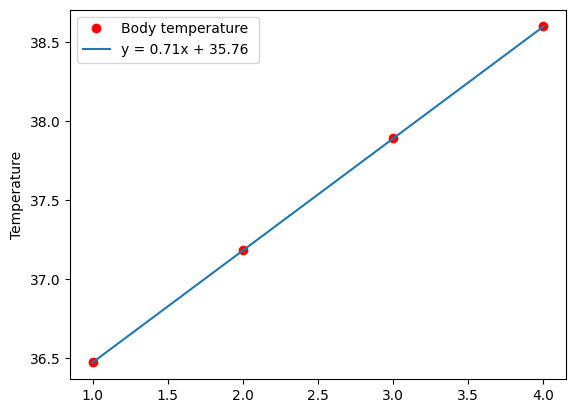

In [24]:
"自由課題②:薬を飲みかつ体温が上がった患者のデータをプロットし，近似直線を示す" #+1.5点
import csv

#f = open('patientlist.csv', 'r')
f = open('patientlist.csv', 'r', encoding="utf-8") #windows の場合
dataReader = csv.reader(f)

csvFileRow = []
#dataの各行をcsvFileRowに入れる
for row in dataReader:
    #print(row)
    csvFileRow.append(row)

label = csvFileRow.pop(0)

nRow = len(csvFileRow) 
#print("lines = ", nRow)
patientList = [] #患者リストの作成
for i in csvFileRow:
    id = i[0]
    gend= i[1]
    medic= i[2]
    tempList= [i[3],i[4],i[5],i[6]]
        #string list からfloat listの変換注意，
    pat = [id, gend, medic, tempList]
    patientList.append(pat)
#print(patientList)
f.close()


class Patient:
    def __init__(self, ID, gender, medicine, temperatureList):
        self.ID = ID; self.gender = gender; self.medicine = medicine; self.temperatureList = temperatureList
    
    def AverageTemp(self):
        N = len(self.temperatureList)
        s = 0
        for i in self.temperatureList:
            s += float(i)
        ave = s/N
        return ave
    
    def TemperatureIncreasingRate(self): #体温増加率（近似直線の傾き）
        N = len(self.temperatureList)
        day = [i for i in range(N)]
        Sxy = 0
        Sx = 0 
        Sy = 0
        Sx2 =0
        for i in range(N):
            xi = float(day[i])
            yi = float(self.temperatureList[i])
            Sxy += xi * float(yi)
            Sx += xi
            Sy += yi
            Sx2 += xi **2
        a = (N*Sxy - Sx*Sy)/(N*Sx2 - Sx**2) #直線の傾き
        self.b = (Sx2*Sy - Sx*Sxy)/(N*Sx2 - Sx**2)
        return a
    def getb(self):
        N = len(self.temperatureList)
        day = [i for i in range(N)]
        Sxy = 0
        Sx = 0 
        Sy = 0
        Sx2 =0
        for i in range(N):
            xi = float(day[i])
            yi = float(self.temperatureList[i])
            Sxy += xi * float(yi)
            Sx += xi
            Sy += yi
            Sx2 += xi **2
        a = (N*Sxy - Sx*Sy)/(N*Sx2 - Sx**2) #直線の傾き
        b = (Sx2*Sy - Sx*Sxy)/(N*Sx2 - Sx**2)
        return b
    
    def maxTemperature(self):
        return max(self.temperatureList)
    
    def minTemperature(self):
        return min(self.temperatureList)

cntind = 0
indmed = 0
id = []
for j in patientList:
    if j[2] =='Yes':
        a = Patient(j[0],j[1],j[2],j[3])
        if a.TemperatureIncreasingRate() > 0:
            id.append(j[0])
            indmed = cntind
    cntind += 1
print(indmed)
#print(f'薬を飲み体温が上がった人のIDは{id}です')
import matplotlib.pyplot as plt

X = [i for i in range(1,5)]
p = patientList[indmed]
Pcla = Patient(p[0],p[1],p[2],p[3])
a = Pcla.TemperatureIncreasingRate()
b = Pcla.getb()

a = round(a,6)
b = round(b,6)
print(a, b)
Y = []
for j in X:
    y = a*j + b
    Y.append(y)

#y = a*x + b
#y = ax+b, xは日の変数

plt.plot(X,Y,'ro',label='Body temperature')
plt.plot(X,Y, label = f'y = {a}x + {b} ')
plt.xlabel("")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [ ]:
"自由課題③:体温が上がった患者のデータをcsv ファイルに出力する" #+2点
import csv

#f = open('patientlist.csv', 'r')
f = open('patientlist.csv', 'r', encoding="utf-8") #windows の場合
dataReader = csv.reader(f)

csvFileRow = []
#dataの各行をcsvFileRowに入れる
for row in dataReader:
    #print(row)
    csvFileRow.append(row)

label = csvFileRow.pop(0)

nRow = len(csvFileRow) 
#print("lines = ", nRow)
patientList = [] #患者リストの作成
for i in csvFileRow:
    id = i[0]
    gend= i[1]
    medic= i[2]
    tempList= [i[3],i[4],i[5],i[6]]
        #string list からfloat listの変換注意，
    pat = [id, gend, medic, tempList]
    patientList.append(pat)
#print(patientList)
f.close()


class Patient:
    def __init__(self, ID, gender, medicine, temperatureList):
        self.ID = ID; self.gender = gender; self.medicine = medicine; self.temperatureList = temperatureList
    
    def AverageTemp(self):
        N = len(self.temperatureList)
        s = 0
        for i in self.temperatureList:
            s += float(i)
        ave = s/N
        return ave
    
    def TemperatureIncreasingRate(self): #体温増加率（近似直線の傾き）
        N = len(self.temperatureList)
        day = [i for i in range(N)]
        Sxy = 0
        Sx = 0 
        Sy = 0
        Sx2 =0
        for i in range(N):
            xi = float(day[i])
            yi = float(self.temperatureList[i])
            Sxy += xi * float(yi)
            Sx += xi
            Sy += yi
            Sx2 += xi **2
        a = (N*Sxy - Sx*Sy)/(N*Sx2 - Sx**2) #直線の傾き
        self.b = (Sx2*Sy - Sx*Sxy)/(N*Sx2 - Sx**2)
        return a
    def getb(self):
        N = len(self.temperatureList)
        day = [i for i in range(N)]
        Sxy = 0
        Sx = 0 
        Sy = 0
        Sx2 =0
        for i in range(N):
            xi = float(day[i])
            yi = float(self.temperatureList[i])
            Sxy += xi * float(yi)
            Sx += xi
            Sy += yi
            Sx2 += xi **2
        a = (N*Sxy - Sx*Sy)/(N*Sx2 - Sx**2) #直線の傾き
        b = (Sx2*Sy - Sx*Sxy)/(N*Sx2 - Sx**2)
        return b
    
    def maxTemperature(self):
        return max(self.temperatureList)
    
    def minTemperature(self):
        return min(self.temperatureList)


f = open("feelbadpatient.csv","w")
f.write("ID\n")
for j in patientList:
    ptt = Patient(j[0],j[1],j[2],j[3])
    a = ptt.TemperatureIncreasingRate()
    if a > 0:
        f.write(f'{j[0]}\n')

f.close()
